# Final Project Econ 323

Canada's indigenous population is currently facing a water crisis. More than 100 First Nation communities have long term water boil advisories in place, meaning they are without access to clean drinking water. 

Many Canadian indigneous populations have faced these conditions for years, and some, for even decades. The average duration of a water boil advisory lasts eight years. In a water-rich country, indigenous nations are facing conditions similar to those in impoverished and developing countries. As a result of increasing pressure from indigenous and social justice organizations, in 2016, the Government of Canada committed to ending all long term drinking water advisories by 2021. 

In this project, I will be investigating how long term water boil advisories affect migration, education, and unemployment levels within indigenous nations in Canada. Using data from Statistics Canada and Indigenous Services Canada, I will be looking at long term water boil advisories for the period of 1996-2016. This project is based upon my existing thesis in Econ 494. 

### Initial Cleaning of Data
I take a data set in which I have merged individual census data for each affected Indigenous nation (which was previously merged within Python) and clean it further.

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm


import qeds
qeds.themes.mpl_style();
plotly_template = qeds.themes.plotly_template()
colors = qeds.themes.COLOR_CYCLE

from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
from sklearn import linear_model

In [5]:
Demo_data = pd.read_excel(r'master_data_2016_python.xlsx')
demo_df = pd.DataFrame(Demo_data)
demo_df.head()

#dropping columns
demo_df.drop(["  Married spouses and common-law partners", "  Lone parents"], axis = 1, inplace = True)
demo_df.drop(["Number of Years Advisory was On "], axis=1, inplace = True)

#cleaning column names 
demo_df.rename(columns={"Year":"year", "First Nation":"first_nation", "Population": "population"}, inplace = True)
demo_df.rename(columns={"Total - Marital Status 15 years and over":"total_married"}, inplace = True)
demo_df.rename(columns={"% of the Aboriginal identity population with an Aboriginal language as mother tongue":"aboriginal_mother_tongue"}, inplace = True)
demo_df.rename(columns={"% of the Aboriginal identity population who speak an Aboriginal language most often at home":"aboriginal_home_language"}, inplace = True)
demo_df.rename(columns={"  Children in census families":"children"}, inplace = True)
demo_df.rename(columns={"  Married or living common law":"married_commonlaw","  Not married and not living common law":"notmarried_commonlaw"}, inplace = True)
demo_df.rename(columns={"Total - Family Characteristics":"total_family","  Persons not in census families":"not_in_family"}, inplace = True)
demo_df.rename(columns={"Total - Mobility status 1 year ago ":"total_mobility_1yr", "Total - Mobility status 5 years ago":"total_mobility_5yr"}, inplace = True)
demo_df.rename(columns={"  Non-movers":"non-movers_1yr","  Movers":"movers_1yr","  Non-movers.1":"non-movers_5yr","  Movers.1":"movers_5yr"}, inplace = True)
demo_df.rename(columns={"Total - Highest certificate, diploma or degree ":"total_hs_higher_edu","  No certificate, diploma or degree":"no_hs_higheredu","  Secondary (high) school diploma or equivalency certificate":"hs_edu"}, inplace = True)
demo_df.rename(columns={"   Persons with a trades; college or university certificate or diploma (below bachelor's degree)":"higher_edu_below"}, inplace = True)
demo_df.rename(columns={"  University certificate, diploma or degree at bachelor level or above":"higher_edu_bach"}, inplace = True)
demo_df.rename(columns={"Total - Labour force status ": "total_lbr","  In the labour force":"in_lbr_force","    Employed":"employed","    Unemployed":"unemployed","  Not in the labour force":"not_in_lbr_force"},inplace = True)
demo_df.rename(columns={"Participation rate":"participation_rate", "Employment rate":"employment_rate","Unemployment rate":"unemployment_rate","Multiple On":"multiple_on","Advisory On":"advisory_on"}, inplace = True)

#converting all relevant columns into percentages represented in decimal format
demo_df["employment_rate"] = demo_df["employment_rate"].div(100)
demo_df["unemployment_rate"] = demo_df["unemployment_rate"].div(100)
demo_df["participation_rate"] = demo_df["participation_rate"].div(100)
demo_df["married"] = demo_df["married_commonlaw"]/demo_df["total_married"]
demo_df["child_perc"] = demo_df["children"]/demo_df["total_family"]
demo_df["single_perc"] = demo_df["not_in_family"]/demo_df["total_family"]
demo_df["movers_1yr_perc"] = demo_df["movers_1yr"]/demo_df["total_mobility_1yr"]
demo_df["movers_5yr_perc"] = demo_df["movers_5yr"]/demo_df["total_mobility_5yr"]

#generating new column for hs and uni education
demo_df["high_school_more"] = demo_df["hs_edu"] + demo_df["higher_edu_bach"]+ demo_df["higher_edu_below"]
demo_df["high_school_more"] = demo_df["high_school_more"]/demo_df["total_hs_higher_edu"]

#filling Nan with 0's
demo_df = demo_df.fillna(0)


#preview of cleaned data  
demo_df.head()


,year,first_nation,population,total_married,married_commonlaw,notmarried_commonlaw,total_family,children,not_in_family,aboriginal_mother_tongue,...,employment_rate,unemployment_rate,multiple_on,advisory_on,married,child_perc,single_perc,movers_1yr_perc,movers_5yr_perc,high_school_more
0,1996-01-01,Shoal Lake No.40,164,100.0,35.0,70.0,40.0,30.0,0.0,0.666667,...,0.450,0.167,0,0,0.350000,0.750000,0.0,0.0,0.0,0.0
1,1996-01-01,North Spirit Lake,157,110.0,35.0,75.0,35.0,25.0,0.0,0.750000,...,0.478,0.231,0,0,0.318182,0.714286,0.0,0.0,0.0,0.0
2,1996-01-01,Sandy Lake,1611,950.0,450.0,500.0,355.0,290.0,0.0,0.618012,...,0.416,0.186,0,0,0.473684,0.816901,0.0,0.0,0.0,0.0
3,1996-01-01,Toosey,75,55.0,0.0,50.0,15.0,10.0,0.0,0.133333,...,0.500,0.250,0,0,0.000000,0.666667,0.0,0.0,0.0,0.0
4,1996-01-01,Indian Island,52,30.0,5.0,25.0,15.0,0.0,0.0,0.272727,...,0.333,0.500,0,0,0.166667,0.000000,0.0,0.0,0.0,0.0


### Preliminary Graphs of the Data

Here I look the outcome variables: high school and/or higher level education, unemployment rates, and migration (as measured by population change) and see how they are affected when a long term water boil advisory is turned on. These graphs are meant to give some preliminary observations on the composition of the data before regressions are run. 




Text(0.5, 1.0, 'Proportion of Indigneous community with HS/Higher Education')

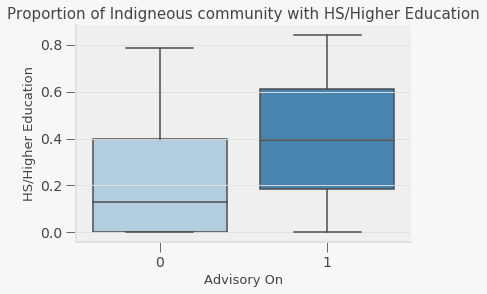

In [136]:
#boxpot of HS/Higher Education
import seaborn as sns
edu_boxplot = sns.boxplot(x="advisory_on", y="high_school_more", data=demo_df, palette = "Blues")
edu_boxplot.set_xlabel("Advisory On", fontsize = 13)
edu_boxplot.set_ylabel("HS/Higher Education", fontsize = 13)
edu_boxplot.set_title("Proportion of Indigneous community with HS/Higher Education", fontsize= 15)

Text(0.5, 1.0, 'Unemployment Rate Dynamics')

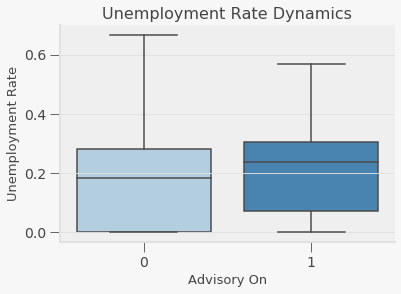

In [137]:
#boxplot of unemployment rate
unemp_boxplot = sns.boxplot(x="advisory_on", y="unemployment_rate", data=demo_df, palette = "Blues")
unemp_boxplot.set_xlabel("Advisory On", fontsize = 13)
unemp_boxplot.set_ylabel("Unemployment Rate", fontsize = 13)
unemp_boxplot.set_title("Unemployment Rate Dynamics", fontsize=16)


Text(0.5, 1.0, 'Population Dynamics')

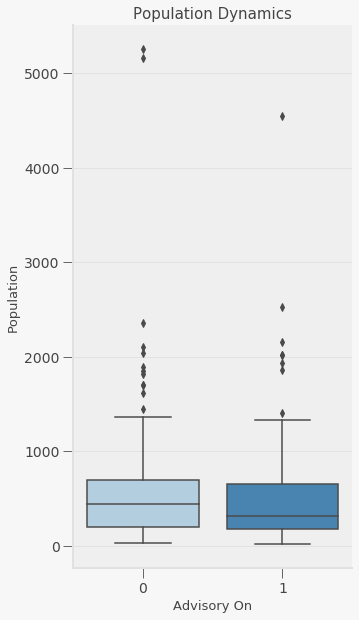

In [138]:
#boxplot of migration (population)

plt.figure(figsize=(5,10))
pop_boxplot = sns.boxplot(x="advisory_on", y="population", data=demo_df, palette = "Blues")
pop_boxplot.set_xlabel("Advisory On", fontsize = "13")
pop_boxplot.set_ylabel("Population", fontsize = "13")
pop_boxplot.set_title("Population Dynamics", fontsize = 15)

[-1, 2, 0, 1500]

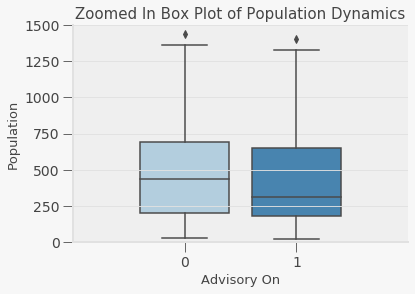

In [139]:
#zooming in 
pop_boxplot = sns.boxplot(x="advisory_on", y="population", data=demo_df, palette = "Blues")
pop_boxplot.set_xlabel("Advisory On", fontsize = 13)
pop_boxplot.set_ylabel("Population", fontsize = 13)
pop_boxplot.set_title("Zoomed In Box Plot of Population Dynamics", fontsize =15 )
plt.axis([-1,2,0,1500])

From the graphs, we see that when an advisory is turned on, the mean of the unemployment rate and attainment of a highschool/higher level education is higher than when an adivsory is off or not in place. For population (migration change) we see that it is slightly lower when an advisory is in effect. What will be interesting to see is how 

### Map of Water Boil Advisories


To get a better idea of how long term water boil advisories are distributed across Canada, I'm going to make a map of the individual First Nation communities that are affected. First, I'll make my dataset of coordinates so I will be ready to put the point on the map. I created this dataset by searching up affected First Nation community names, and obtained coordinates from the GeoHacks website from Wikipedia, or from Google Maps. 

In [140]:
#setting up the libraries for the map
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import shapefile
from shapely.geometry import Point
from shapely.geometry import Polygon

#downloading coordinates for First Nation communities
map_data = pd.read_excel(r'map data 2.0.xlsx')
map_df = pd.DataFrame(map_data)
map_df.head()
map_df["Coordinates"] = list(zip(map_df["Longitude"], map_df["Latitude"]))
map_df["Coordinates"] = map_df["Coordinates"].apply(Point)


#making the map data as a Geo Data Frame
geo_wb_map = gpd.GeoDataFrame(map_df, geometry="Coordinates")
geo_wb_map.head()


,First Nation,Latitude,Longitude,Coordinates
0,Shoal Lake No.40,49.616667,-95.150000,POINT (-95.15000 49.61667)
1,North Spirit Lake,52.483333,-93.033333,POINT (-93.03333 52.48333)
2,Sandy Lake,53.066667,-93.333333,POINT (-93.33333 53.06667)
3,Toosey,51.919444,-122.483333,POINT (-122.48333 51.91944)
4,Indian Island,46.690000,-64.790000,POINT (-64.79000 46.69000)


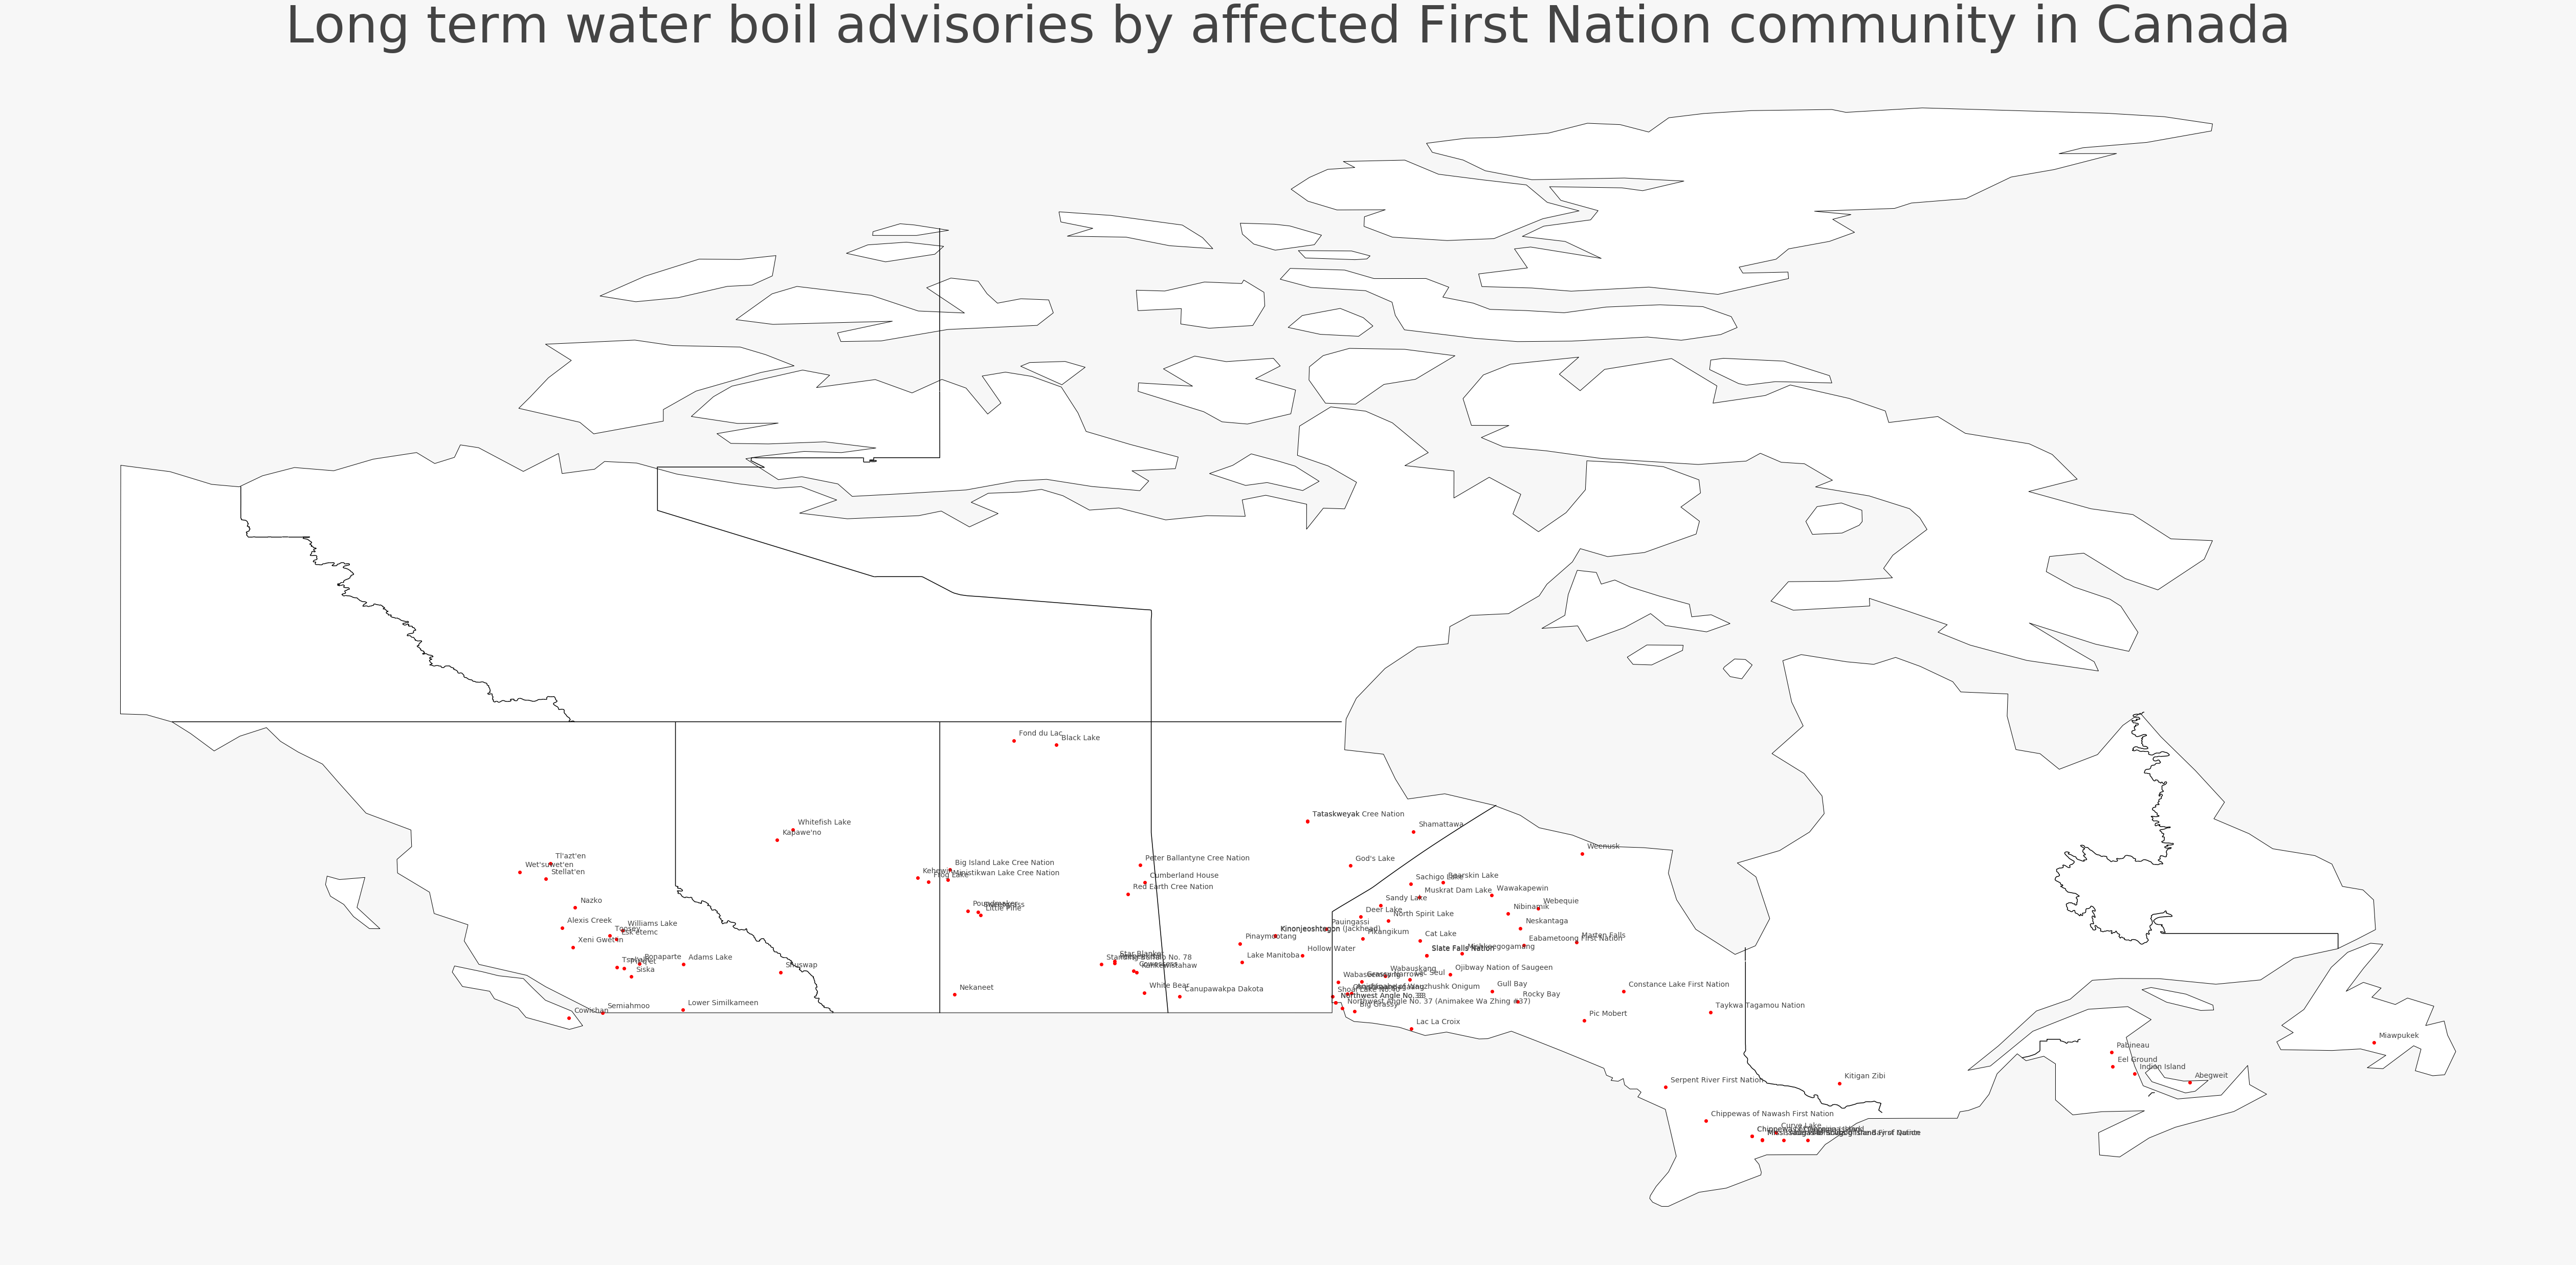

In [141]:
#creating the map

fig, gax = plt.subplots(figsize=(90,90))
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.query("name == 'Canada'").plot(ax=gax, edgecolor='black', color='white')

geo_wb_map.plot(ax=gax, color='red', alpha = 1)

world = gpd.read_file('ne_10m_admin_1_states_provinces_lines.shp')
can = world.query("adm0_name == 'Canada'")
can.plot(ax=gax, color='black')

gax.set_title('Long term water boil advisories by affected First Nation community in Canada', fontsize = 100)

for x, y, label in zip(geo_wb_map['Coordinates'].x, geo_wb_map['Coordinates'].y, geo_wb_map['First Nation']):
    gax.annotate(label, xy=(x,y), xytext=(10,10), textcoords='offset points')
    
plt.axis('off')
    
plt.show()

As we can see from the graph above, the provinces that are most affected by long term water boil advisories are Manitoba and Ontario. 

### Fixed Effects Regression

Here, I will be looking at a simple fixed effects panel OLS regression for the outcomes of long term water boil advisories on migration, educational attainment, and unemployment rates. 

#### Regression on Migration (as observed through Population change)
For the regression on migration, I will run one (First Nation community and year) fixed effects regression without additional controls, and another with additional controls. These controls will control for noise in the estimate. 

In [27]:
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
demo_df.columns

#regression on population
lm_pop = list()
#no controls, fixed effects
lm_pop.append(smf.ols(formula="population ~ advisory_on + C(first_nation) + C(year)", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))
#controls, fixed effects
lm_pop.append(smf.ols(formula="population ~ advisory_on + C(first_nation) + C(year) + child_perc + movers_1yr_perc + movers_5yr_perc + high_school_more + aboriginal_mother_tongue + aboriginal_home_language", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))


summary_col(lm_pop, stars=True)

,population I,population II
C(first_nation)[T.Adams Lake],235.5662***,245.8122***
,(34.5257),(36.4474)
C(first_nation)[T.Alderville],213.7596***,250.5413***
,(30.6695),(38.5850)
C(first_nation)[T.Alexis Creek],-80.1004***,-68.6247***
,(27.9682),(22.5236)
C(first_nation)[T.Anishinabe of Wauzhushk Onigum],154.5662***,152.0477***
,(8.9334),(14.6395)
C(first_nation)[T.Bearskin Lake],187.3945***,163.8041***
,(41.0356),(37.1499)


#### Regression on Educational Attainment (High School Certificate and/or Higher Education)

In [6]:
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
demo_df.columns

#regression on attainment of high school education and/or higher level education
lm_edu = list()
#no controls, fixed effects
lm_edu.append(smf.ols(formula="high_school_more ~ advisory_on + C(first_nation) + C(year)", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))
#controls, fixed effects
lm_edu.append(smf.ols(formula="high_school_more ~ advisory_on + C(first_nation) + C(year) + child_perc + married", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))


summary_col(lm_edu, stars=True)
#demo_df.columns

,high_school_more I,high_school_more II
C(first_nation)[T.Adams Lake],0.1771,0.1864
,(0.2309),(0.1826)
C(first_nation)[T.Alderville],0.3280*,0.2870**
,(0.1772),(0.1370)
C(first_nation)[T.Alexis Creek],-0.2399,-0.3130**
,(0.1582),(0.1410)
C(first_nation)[T.Anishinabe of Wauzhushk Onigum],0.1591,0.1014
,(0.1655),(0.1141)
C(first_nation)[T.Bearskin Lake],-0.0362,-0.0452
,(0.1838),(0.1252)


#### Regression on Unemployment Rate

In [11]:
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
demo_df.columns

#regression on attainment unemployment rate
lm_unemp = list()
#no controls, fixed effects
lm_unemp.append(smf.ols(formula="unemployment_rate ~ advisory_on + C(first_nation) + C(year)", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))
#controls, fixed effects
lm_unemp.append(smf.ols(formula="unemployment_rate ~ advisory_on + C(first_nation) + C(year) + high_school_more + child_perc + married", data=demo_df,
                  missing="drop").fit(cov_type='HC0'))


summary_col(lm_unemp, stars=True)
#demo_df.columns

,unemployment_rate I,unemployment_rate II
C(first_nation)[T.Adams Lake],0.0384,-0.0169
,(0.0802),(0.0303)
C(first_nation)[T.Alderville],0.0000,-0.1166***
,(0.0571),(0.0307)
C(first_nation)[T.Alexis Creek],-0.0209,0.0175
,(0.0676),(0.0546)
C(first_nation)[T.Anishinabe of Wauzhushk Onigum],0.1288**,0.0539
,(0.0617),(0.0336)
C(first_nation)[T.Bearskin Lake],-0.0406,-0.0656***
,(0.0614),(0.0185)


What I find is that there are no significant effects on migration, high school and/or higher level educational attainment, or unemployment levels. This means that when a long term water boil advisory is in effect, indigenous populations do not move out of their communities, their levels of educational attainment are unaffected, and unemployment rates are unaffected.

### Lasso Regression